In [1]:
from sie import *

##Shoe size data

In [2]:
data=load_data('data/shoesize.xls')

In [3]:
data.head()

,Index,Gender,Size,Height
0,1,F,5.5,60
1,2,F,6.0,60
2,3,F,7.0,60
3,4,F,8.0,60
4,5,F,8.0,60


### Get a subset

In [4]:
import random

In [5]:
random.seed(102)
rows = random.sample(data.index, 10)
newdata=data.ix[rows]
data=newdata
data

,Index,Gender,Size,Height
60,61,F,7.0,64
251,252,M,9.0,70
69,70,F,8.0,64
290,291,M,11.0,71
247,248,M,12.0,69
156,157,F,9.5,68
231,232,M,10.0,69
17,18,F,6.5,61
216,217,M,10.0,68
252,253,M,9.0,70


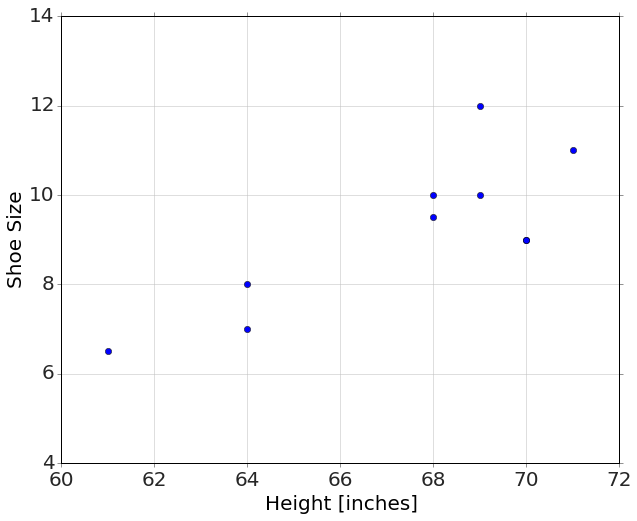

In [7]:
plot(data['Height'],data['Size'],'o')
gca().set_xlim([60,72])
gca().set_ylim([4,14])
xlabel('Height [inches]')
ylabel('Shoe Size')

### Do the regression

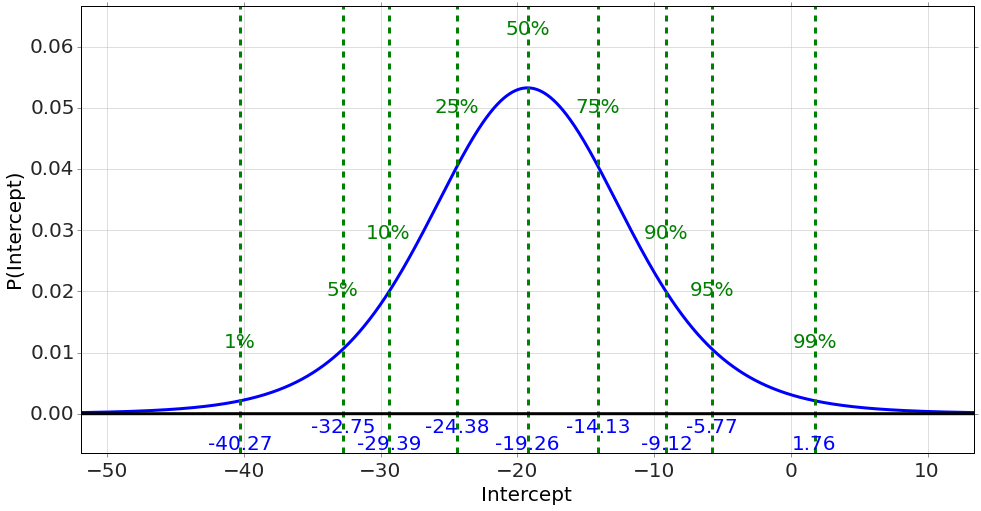

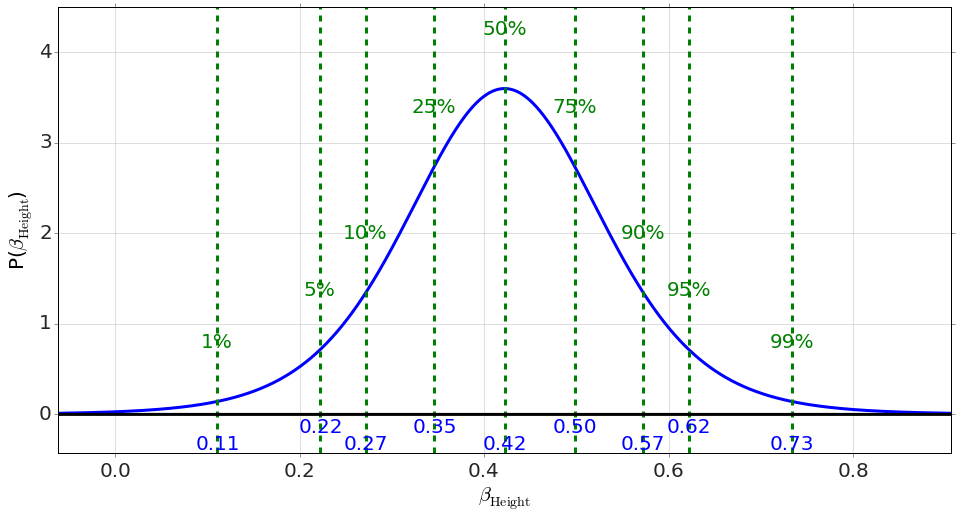

In [8]:
result=regression('Size ~ Height',data)

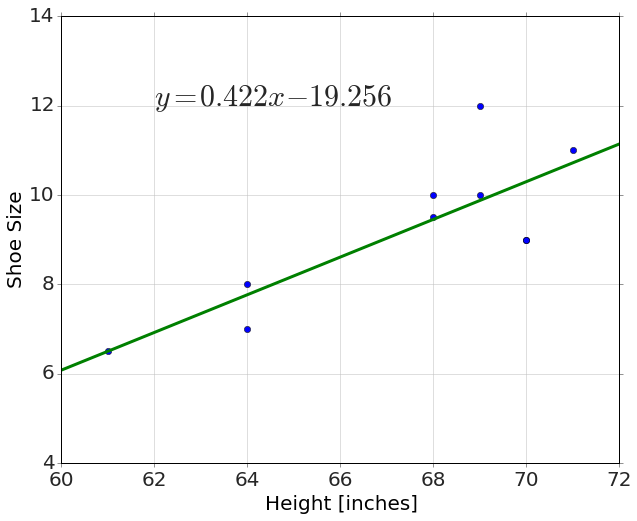

In [10]:
plot(data['Height'],data['Size'],'o')

h=linspace(60,72,10)
plot(h,result['_Predict'](Height=h),'-')

gca().set_xlim([60,72])
gca().set_ylim([4,14])
xlabel('Height [inches]')
ylabel('Shoe Size')

b=result.Intercept.mean()
m=result.Height.mean()

if b>0:
    text(62,12,'$y=%.3f x + %.3f$' % (m,b),fontsize=30)
else:
    text(62,12,'$y=%.3f x %.3f$' % (m,b),fontsize=30)

## SAT Data

In [12]:
data=load_data('data/sat.csv')

### Simple Linear Regression

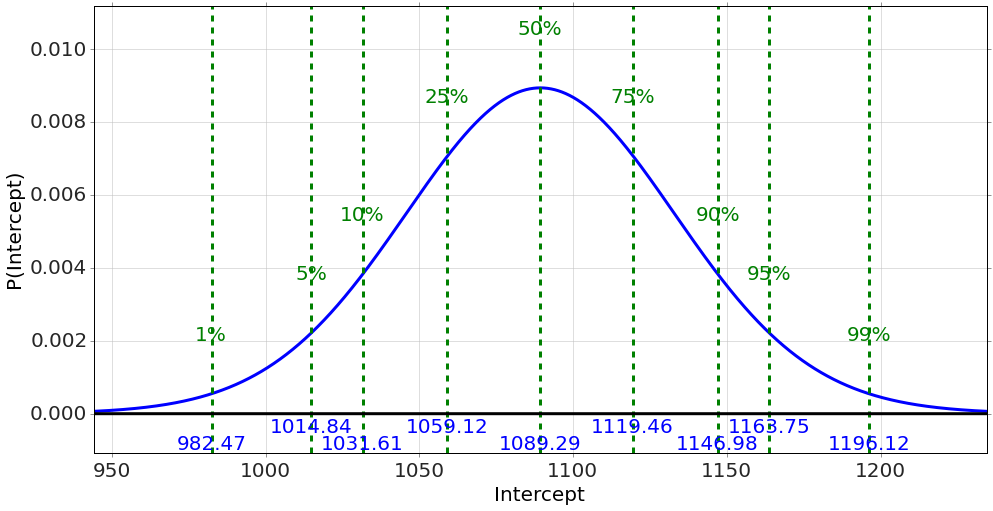

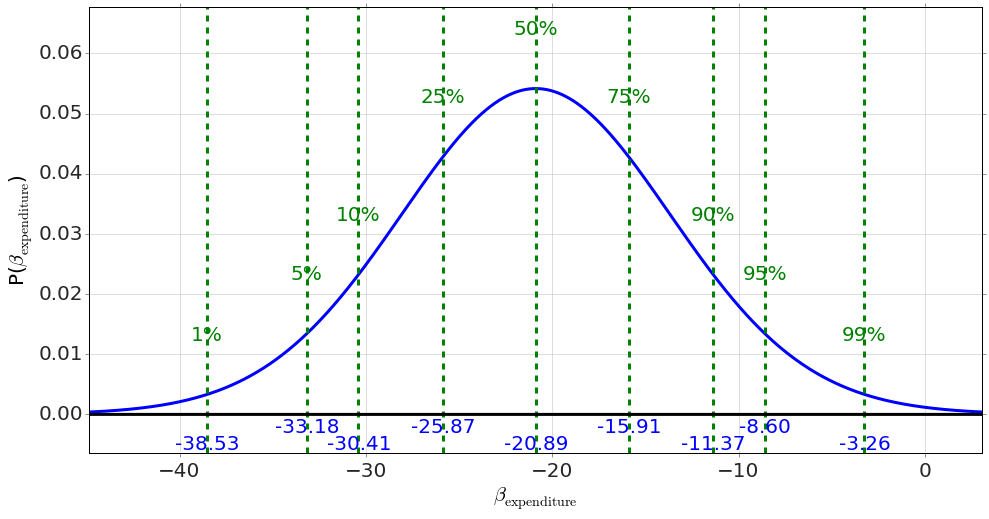

In [13]:
result=regression('total ~ expenditure',data)

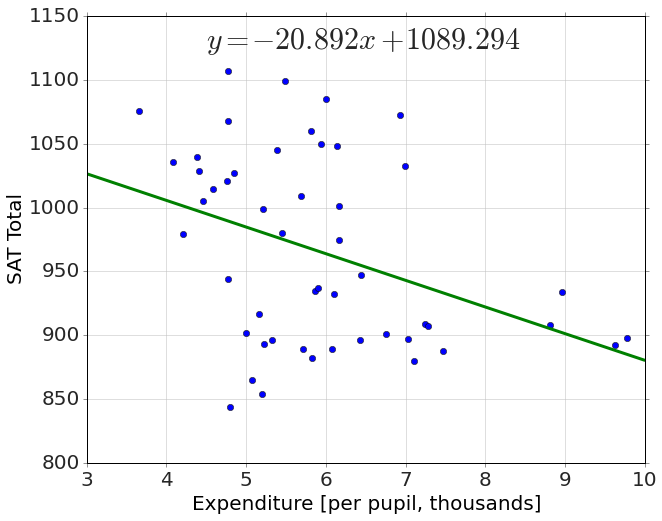

In [15]:
plot(data['expenditure'],data['total'],'o')
xlabel('Expenditure [per pupil, thousands]')
ylabel('SAT Total')
h=linspace(3,10,10)
plot(h,result['_Predict'](expenditure=h),'-')

b=result.Intercept.mean()
m=result.expenditure.mean()

if b>0:
    text(4.5,1125,'$y=%.3f x + %.3f$' % (m,b),fontsize=30)
else:
    text(4.5,1125,'$y=%.3f x %.3f$' % (m,b),fontsize=30)


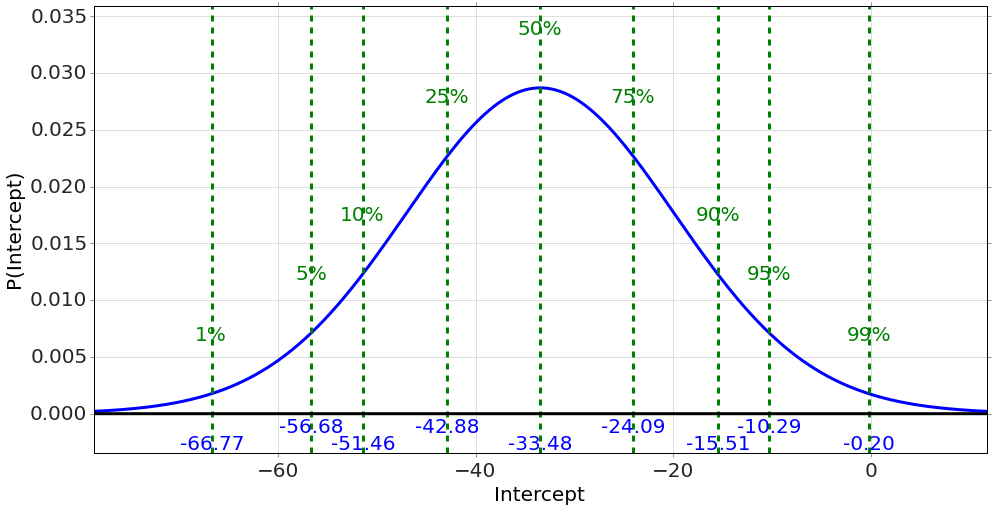

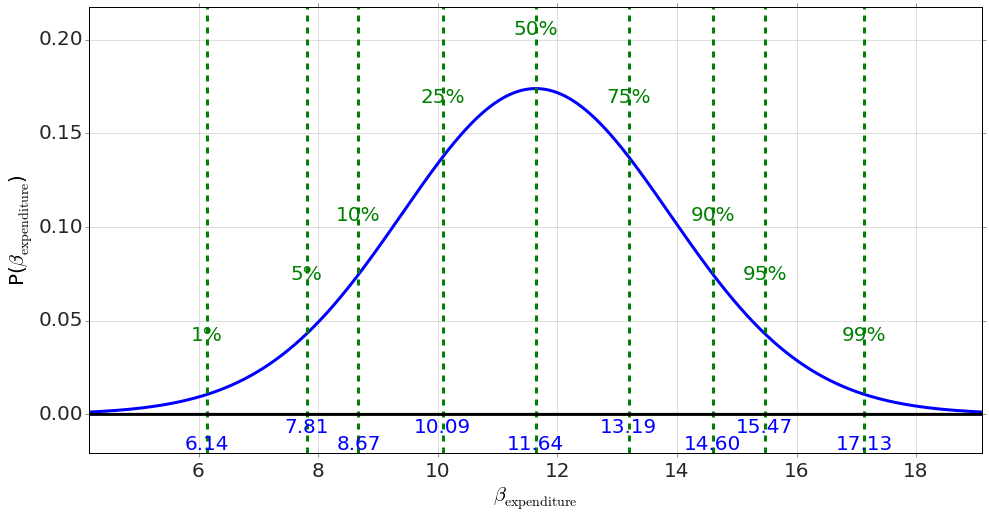

In [16]:
result=regression('percent_taking ~ expenditure',data)

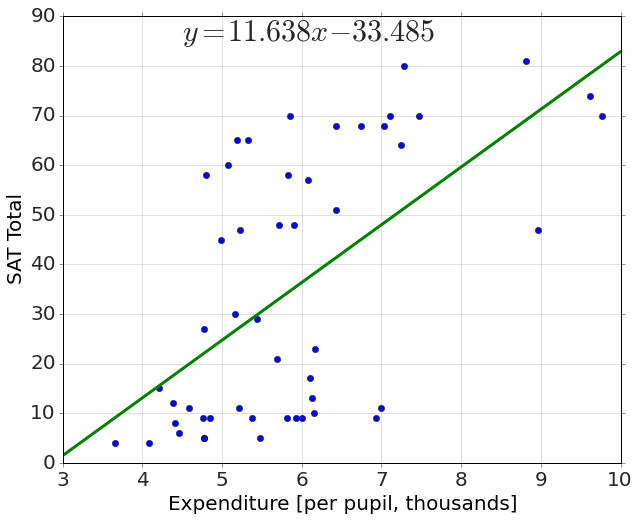

In [19]:
plot(data['expenditure'],data['percent_taking'],'o')
xlabel('Expenditure [per pupil, thousands]')
ylabel('SAT Total')
h=linspace(3,10,10)
plot(h,result['_Predict'](expenditure=h),'-')

b=result.Intercept.mean()
m=result.expenditure.mean()

if b>0:
    text(4.5,85,'$y=%.3f x + %.3f$' % (m,b),fontsize=30)
else:
    text(4.5,85,'$y=%.3f x %.3f$' % (m,b),fontsize=30)


### Multiple Regression

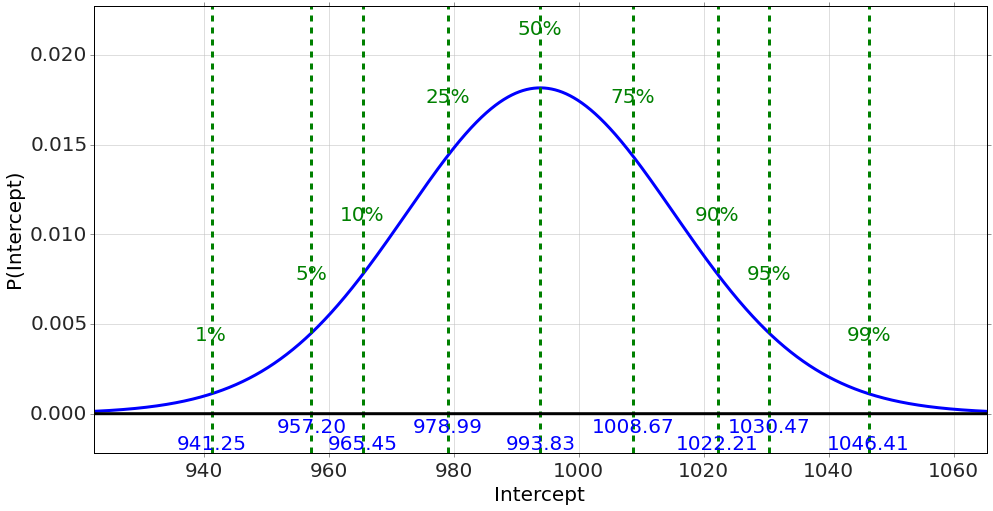

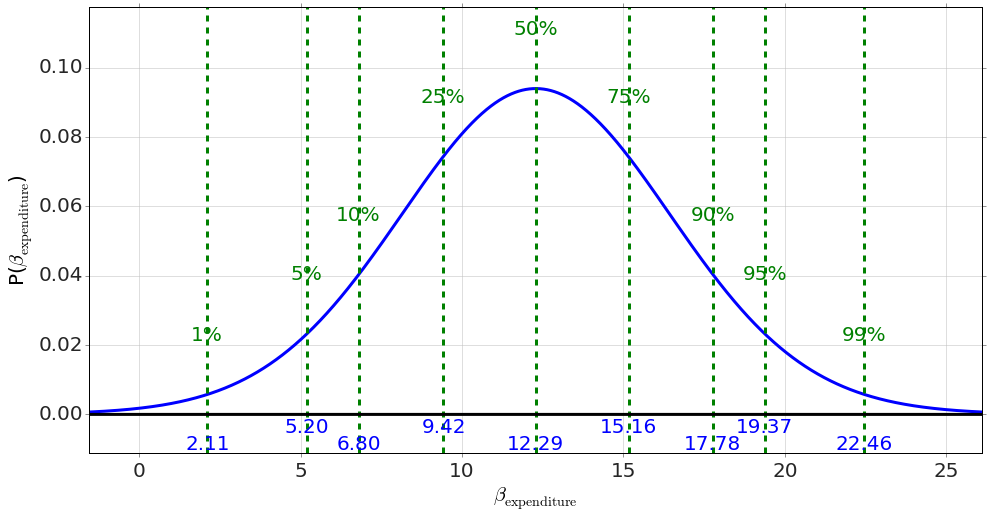

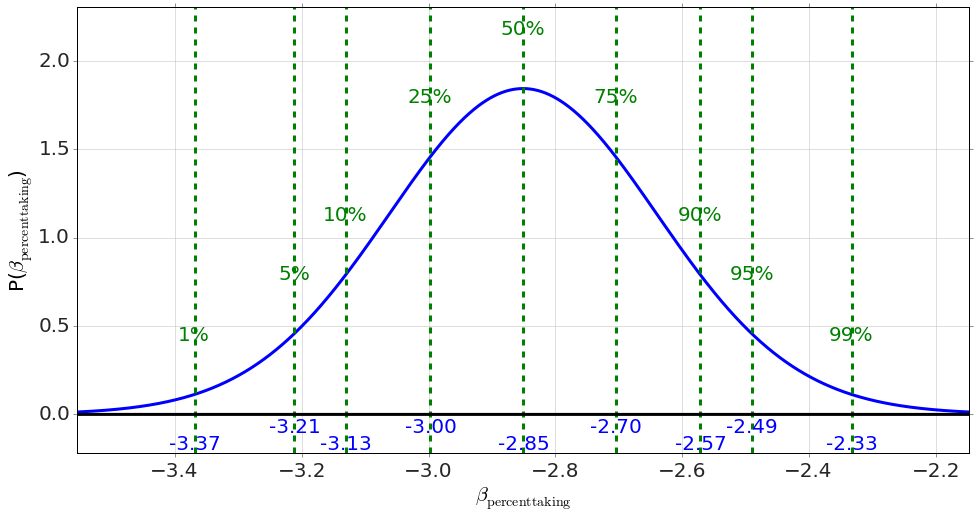

In [20]:
result=regression('total ~ expenditure + percent_taking',data)